## Probability, Conditional Probability, Bayes' Theorem
## Conditional Probability
**Conditional Probability is defined as the probability of an event ( A ), given that another ( B ) has already occurred.**

If events A and B are not independent, then the probability of the intersection of A and B (the probability that both P(B|A) = vents occur) is defined by 
P(A and B) = P(A)P(B|A).

From this definition, the conditional probability P(B|A) is easily obtained by dividing by P(A):

**P(B|A) = P(B and A) / P(A)**

In the Predictive Analytics section we will learn a very widely used **Classification** algorithm called the **Naive Bayes Classifiaction Algorithm**.

It is a Machine Learning algorithm that is often used in data sets with multiple attributes. It is very easy to calculate and hence is often used to classify things in real time, such as "if an email containing a set of key words is classified as spam", "a newly published article belongs to a class of articles", "if an insurance claim, just submitted is real or fraud" etc.

The **Bayes** part of the name comes from Thomas Bayes, the inventor of the foundational Bayes' theorem and the **Naive** part of the name comes from the assumption that the factors guiding the occurrance of an event are **independent** of each other, even though in real life, they may not be so (a somewhat **naive** assumption). However, this algorithm produces very good/reliable results and is widely used.



## Bayes' Theorem
Bayes' Theorem (also called Bayes' Law or Bayes' Formula) is stated as

***Probability of an event A given that an event B has occurred, is equal to the probability of B given A has occurred multiplied by the probability of A given B has occurred divided by the probability of B***

***P(A|B) = (P(B|A) X P(A))/P(B)***

where

P(A|B) = Probability of event A given the event B has occurred

P(B|A) = Probability of event B given the event A has occurred

P(A), P(B) = Probabilities of event A and B respectively

### Commonly used terms in Bayesian Classification
A is called the **Proposition** and B is called the **Evidence**

P(A) is called the **Prior Probability of Proposition** and P(B) is called the **Prior probability of Evidence**

P(A|B) is called the **Posterior**

P(B|A) is called the **Likelyhood**


In other words

***Posterior = (Likelihood X Prior Probability of Proposition)/Prior Probability of Evidence***

### Bayesian Theorem as applied to Naive Bayes Algorithm
In Machine Learning classification there are multiple clesses C1, C2, C3...and each class with multiple features x1, x2, x3...(e.g. an insurance claim is in class 'Valid' or 'Fraud' and each claim has features such as 'amount of claim', 'doctor submitting the claim', 'amount of the claim', 'frequency of high value claim for same treatment by the same doctor' etc.). The aim of the algorithm is to determine the **Conditional Probability** of an object (an insurance claim) with features x1, x2,...xn belonging to a class Ci.

We will learn Bayesin Classification and it's calculation (using Python) in much more details in the **Predictive Analytics** section.


https://www.youtube.com/watch?v=sjUDlJfdnKM.

https://www.youtube.com/watch?v=CPqOCI0ahss.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mth
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Comparing K_Mean Clustering, Naive Bayes and Logistic Regression using Iris Data

In [22]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.feature_names
iris.data
iris.target_names
iris.target

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
iris_df.head(20)

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [24]:
iris_df1 = pd.DataFrame(iris.target)
iris_df1.head(10)
iris_df1.tail(10)
iris_df1[30:105]

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


,0
140,2
141,2
142,2
143,2
144,2
145,2
146,2
147,2
148,2
149,2


,0
30,0
31,0
32,0
33,0
34,0
...,...
100,2
101,2
102,2
103,2


## Prediction using K-Mean Clustering

## Defintions of "Accuracy", "Precision" and "Recall" scores of the prediction of a model

### Accuracy = Number of correct prediction / Total Number of Predition

### Precision = True Positive / (True Positive + False Positive)

### Recall = True Positive / (True Positive + False Negative)

In [25]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=3)
kmodel = kmeans.fit(iris.data)
expected = iris.target
#predicted = kmodel.labels_
predicted = kmodel.predict(iris.data)
print('======>', predicted)
from sklearn import metrics
print(metrics.classification_report(expected, kmodel.labels_))
print(metrics.confusion_matrix(expected, predicted))

======> [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.23      0.28      0.25        50

    accuracy                           0.09       150
   macro avg       0.08      0.09      0.08       150
weighted avg       0.08      0.09      0.08       150

[[ 0 50  0]
 [ 2  0 48]
 [36  0 14]]


## Prediction using Gaussian Naive Bayes Model

## Defintions of "Accuracy", "Precision" and "Recall" scores of the prediction of a model

### Accuracy = Number of correct prediction / Total Number of Predition

### Precision = True Positive / (True Positive + False Positive)

### Recall = True Positive / (True Positive + False Negative)

In [26]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [27]:
iris_target = pd.DataFrame(iris.target)
iris_target.columns = ['Target Species']

In [28]:
nbmodel = GaussianNB()
nbmodel.fit(iris.data, iris.target)

GaussianNB()

In [29]:
expected = iris.target
predicted = nbmodel.predict(iris.data)

In [30]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


## Prediction using  Multi-factors Logistic Regression

## Defintions of "Accuracy", "Precision" and "Recall" scores of the prediction of a model

### Accuracy = Number of correct prediction / Total Number of Predition

### Precision = True Positive / (True Positive + False Positive)

### Recall = True Positive / (True Positive + False Negative)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#print(metrics.classification_report(expected, predicted))
#print(metrics.confusion_matrix(expected, predicted))

In [32]:
lr_model = LogisticRegression()
lr_model.fit(iris.data, iris.target)
#print(lr_model)
# make predictions
expected = iris.target
predicted = lr_model.predict(iris.data)

print('================ Result ==================')
print('++++++++++++++++ Actual/Expected ++++++++++++++++++')
print(expected)
print('++++++++++++++ Predicted ++++++++++++++++++++++++++')
print(predicted)
# summarize the fit of the model
print('=============== Model Performance Results ===========')
print(metrics.classification_report(expected, predicted))
print('============ Model Confusion Matrix ===========')
print(metrics.confusion_matrix(expected, predicted))
print('=============== Model Accuracy ==============')
print(metrics.accuracy_score(expected, predicted))

LogisticRegression()

================ Result ==================
++++++++++++++++ Actual/Expected ++++++++++++++++++
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
++++++++++++++ Predicted ++++++++++++++++++++++++++
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
=============== Model Performance Results ===========
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94 

## Prediction using Naive Bayes and Multi-Class Regression classifiers Native Indian Diabetes data sample

# Defintions of "Accuracy", "Precision" and "Recall" scores of the prediction of a model

### Accuracy = Number of correct prediction / Total Number of Predition

### Precision = True Positive / (True Positive + False Positive)

### Recall = True Positive / (True Positive + False Negative)


In [33]:
df0 = pd.read_csv("pima-indians-diabetes.csv")

In [34]:
df0.head(20)

,Pregnancies,Glucose,BloodP,SkinThick,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [35]:
df0.describe()

,Pregnancies,Glucose,BloodP,SkinThick,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [36]:
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
plt.rcParams["figure.figsize"]=15, 10

In [37]:
data_mod = df0[(df0.BloodP != 0) & (df0.BMI != 0) & (df0.Glucose != 0)]
data_mod.head(20)
train, test = train_test_split(data_mod, test_size=0.25)
print(data_mod.shape)
print(train.shape)
print(test.shape)

,Pregnancies,Glucose,BloodP,SkinThick,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
10,4,110,92,0,0,37.6,0.191,30,0
11,10,168,74,0,0,38.0,0.537,34,1


(724, 9)
(543, 9)
(181, 9)


In [38]:
features = ['Pregnancies', 'Glucose', 'BloodP', 'SkinThick', 'BMI', 'Age', 'Insulin', 'DiabetesPedigreeFunction']
target = 'Outcome'

classifiers = [gnb(), lr()]

classifier_names = ['Gaussian Naive Bayes', 'Logistic Regression']

for clf, clf_name in zip(classifiers, classifier_names):
    cv_scores = cross_val_score(clf, train[features], train[target], cv=5)
    
    print(clf_name, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

Gaussian Naive Bayes  mean accuracy:  73.663 % std:  0.07 %
Logistic Regression  mean accuracy:  76.245 % std:  0.034 %


## Explanation of the X and Y axes of the Heat Map

### X-Axis = Prediction, 0 = True 1 = False
### Y-Axis = Actual, 0 = True, 1 = False

test accuracy for Gaussian naive bayes classifier: 78.45 %
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       119
           1       0.73      0.60      0.65        62

    accuracy                           0.78       181
   macro avg       0.77      0.74      0.75       181
weighted avg       0.78      0.78      0.78       181

[[105  14]
 [ 25  37]]


Text(0.5, 1.0, 'confusion matrix for Gaussian naive bayes classifier')

<AxesSubplot:title={'center':'confusion matrix for Gaussian naive bayes classifier'}>

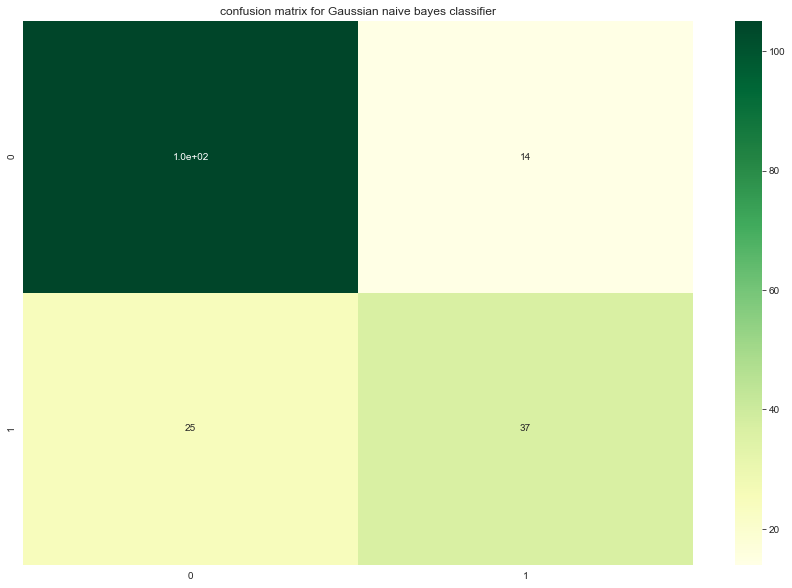

In [39]:
final_model_gnb = gnb().fit(train[features], train[target])
y_hat_gnb = final_model_gnb.predict(test[features])

print('test accuracy for Gaussian naive bayes classifier:', \
      round(accuracy_score(test[target], y_hat_gnb)*100, 2),'%')
print(metrics.classification_report(test[target], y_hat_gnb))
print(confusion_matrix(test[target], y_hat_gnb))
plt.title('confusion matrix for Gaussian naive bayes classifier')
sns.heatmap(confusion_matrix(test[target], y_hat_gnb), annot=True, cmap="YlGn")
plt.show()

test accuracy for Logistic Regression classifier: 77.9 %


Text(0.5, 1.0, 'confusion matrix for Logistic Regression classifier')

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       119
           1       0.75      0.53      0.62        62

    accuracy                           0.78       181
   macro avg       0.77      0.72      0.73       181
weighted avg       0.78      0.78      0.77       181

[[108  11]
 [ 29  33]]


<AxesSubplot:title={'center':'confusion matrix for Logistic Regression classifier'}>

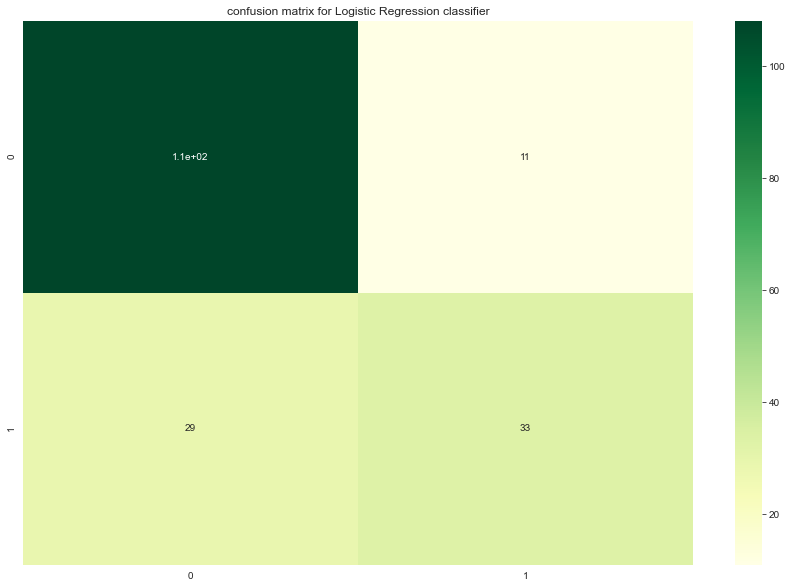

In [40]:
final_model_lr = lr().fit(train[features], train[target])
y_hat_lr = final_model_lr.predict(test[features])

print('test accuracy for Logistic Regression classifier:', \
      round(accuracy_score(test[target], y_hat_lr)*100, 2),'%')
plt.title('confusion matrix for Logistic Regression classifier')
print(metrics.classification_report(test[target], y_hat_lr))
print(confusion_matrix(test[target], y_hat_lr))
sns.heatmap(confusion_matrix(test[target], y_hat_lr), annot=True, cmap="YlGn")
plt.show()